<a href="https://colab.research.google.com/github/poojaagrwal/Deep-Learning/blob/master/VGG_and_Lenet_with_TPU_Support.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dog vs Cat classification using VGG and Lenet architectures

In [21]:
!pip3 install tensorflow-gpu==1.12.0

     |████████████████████████████████| 281.7MB 45kB/s 
     |████████████████████████████████| 3.1MB 32.1MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 1.12.2 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0


In [22]:
!pip3 install tensorflow==1.12.0

     |████████████████████████████████| 83.1MB 43kB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
#import keras
import cv2                 # working with, mainly resizing, images
import os                  # dealing with directories
from random import shuffle # mixing up or currently ordered data that might lead our network astray in training.
from tqdm import tqdm      # a nice pretty percentage bar for tasks. Thanks to viewer Daniel BA1/4hler for this suggestion
from google.colab.patches import cv2_imshow

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import AveragePooling2D, Activation, MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import keras
#from keras.utils import plot_model


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [3]:
print(tf.__version__)
print(tf.keras.__version__)

1.12.0
2.1.6-tf


In [4]:
from google.colab import  drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')  
train_dogs_dir = os.path.join(train_dir, 'dogs')  
validation_cats_dir = os.path.join(validation_dir, 'cats')  
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  

In [7]:
batch_size = 128
epochs = 5
HEIGHT = 150
WIDTH = 150
learning_rate = 0.0001

try:
  device_name = os.environ['COLAB_TPU_ADDR']
  TPU_ADDRESS = 'grpc://' + device_name
  print(TPU_ADDRESS)
except KeyError:
  print('No TPU device')

grpc://10.125.68.122:8470


###Data Preprocessing

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(directory=train_dir,shuffle=True,target_size=(HEIGHT, WIDTH),batch_size=batch_size,class_mode='binary')


Found 2000 images belonging to 2 classes.


In [9]:
vaildation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = vaildation_datagen.flow_from_directory(directory=validation_dir,target_size=(HEIGHT, WIDTH),batch_size=batch_size,class_mode='binary')


Found 1000 images belonging to 2 classes.


In [10]:
train_cats_dir

'/root/.keras/datasets/cats_and_dogs_filtered/train/cats'

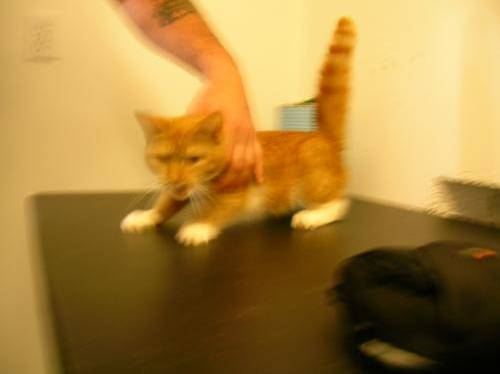

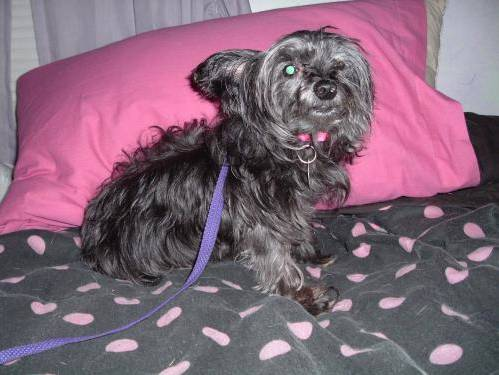

In [11]:
image = cv2.imread(train_cats_dir+"/cat.0.jpg") 
cv2_imshow(image)

image = cv2.imread(train_dogs_dir+"/dog.0.jpg") 
cv2_imshow(image)

In [0]:
#opt = tf.keras.optimizers.Adam()
opt = tf.train.AdamOptimizer()

In [0]:
class LeNet:

    def build():
    
        model = Sequential()
        inputShape = (150,150, 3)

        model.add(Conv2D(6, (3,3),  input_shape=inputShape))
        model.add(Activation("relu"))
        model.add(AveragePooling2D())

        model.add(Conv2D(16, (3,3)))
        model.add(Activation("relu"))
        model.add(AveragePooling2D())

        model.add(Flatten())
        model.add(Dense(120))
        model.add(Activation("relu"))

        model.add(Dense(84))
        model.add(Activation("relu"))

        model.add(Dense(1))
        model.add(Activation("sigmoid"))

        return model


In [0]:
lenet_model = LeNet.build()

In [15]:
print(lenet_model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 6)       168       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 6)       0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 74, 74, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        880       
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 16)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 36, 36, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
__________

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [0]:
lenet_model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['acc'])


Moving lenet_model from CPU to TPU

In [18]:
tpu_lenet_model = tf.contrib.tpu.keras_to_tpu_model(lenet_model, strategy=tf.contrib.tpu.TPUDistributionStrategy(\
                                                                                                                 tf.contrib.cluster_resolver.TPUClusterResolver(TPU_ADDRESS)))


INFO:tensorflow:Querying Tensorflow master (b'grpc://10.125.68.122:8470') for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 10089038537647815651)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 15928210736212597554)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 6743061961111881590)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 15068662706629286378)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 16471964494860231817)
INFO:tensorflow:*** Available Device: _DeviceAttri

In [22]:

lenet_hist = tpu_lenet_model.fit_generator(
      train_generator,
      steps_per_epoch=total_train,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=total_val)

Epoch 1/5
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(16,), dtype=tf.int32, name='core_id0'), TensorSpec(shape=(16, 150, 150, 3), dtype=tf.float32, name='conv2d_input_10'), TensorSpec(shape=(16, 1), dtype=tf.float32, name='activation_4_target_30')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for conv2d_input
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 9.165457725524902 secs
INFO:tensorflow:Setting weights on TPU model.
  15/2000 [..............................] - ETA: 45:36 - loss: 0.7768 - acc: 0.5094INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(10,), dtype=tf.int32, name='core_id0'), TensorSpec(shape=(10, 150, 150, 3), dtype=tf.float32, name='conv2d_input_10'), TensorSpec(shape=(10, 1), dtype=tf.float32, name='activation_4_target_30')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Rema

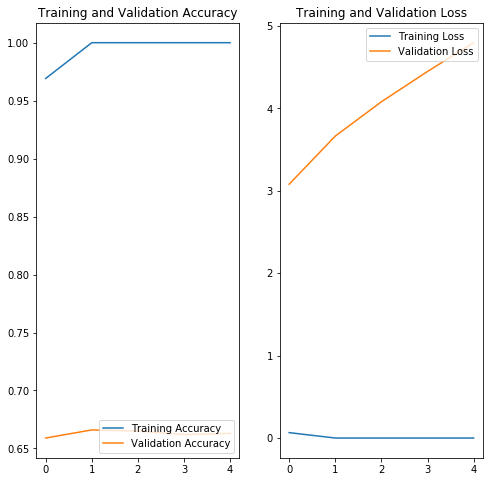

In [0]:

train_acc = lenet_hist.history['acc']
val_acc = lenet_hist.history['val_acc']

train_loss = lenet_hist.history['loss']
val_loss = lenet_hist.history['val_loss']
epochs = 5
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Modified Lenet

Data generation for augmentation for modified lenet

In [0]:
def plotImages(images_arr, subplt):
    fig, axes = plt.subplots(1, subplt, figsize=(15,15))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Found 2000 images belonging to 2 classes.


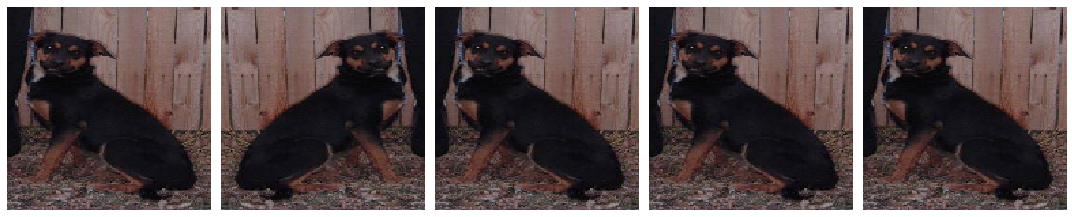

In [20]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(
        directory=train_dir,
        shuffle=True,
        target_size=(HEIGHT, WIDTH),
        batch_size=batch_size)
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images,5)

Found 2000 images belonging to 2 classes.


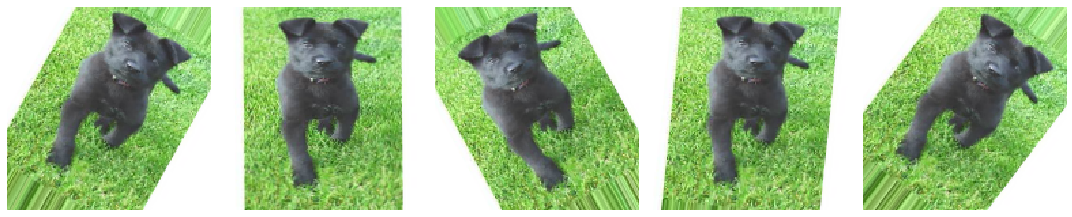

In [21]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(HEIGHT, WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images,5)

Found 2000 images belonging to 2 classes.


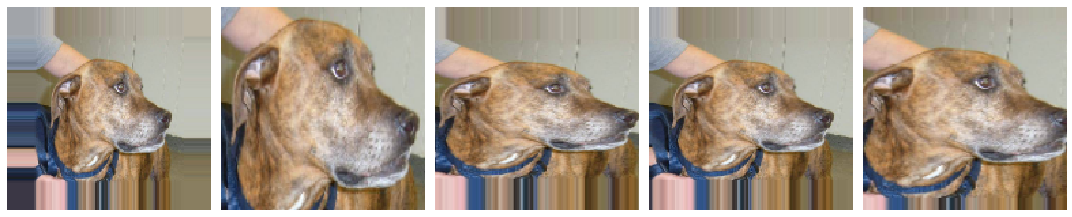

In [22]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(HEIGHT,WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images,5)

Found 2000 images belonging to 2 classes.


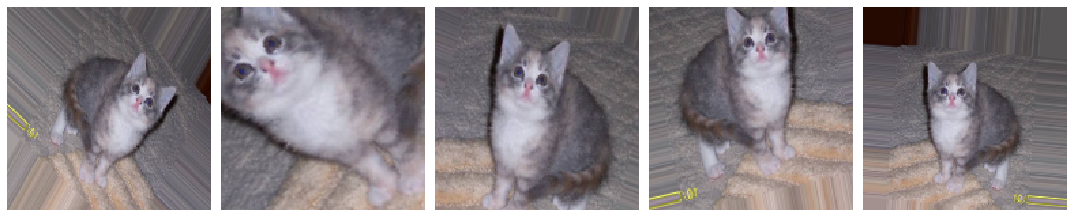

In [23]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(HEIGHT, WIDTH),
                                                     class_mode='binary')
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images,5)

In [0]:
lenet_model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [25]:

hist_lenet_modified = tpu_lenet_model.fit_generator(
      train_data_gen,
      steps_per_epoch=total_train,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=total_val)

Epoch 1/5
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(16,), dtype=tf.int32, name='core_id0'), TensorSpec(shape=(16, 150, 150, 3), dtype=tf.float32, name='conv2d_input_10'), TensorSpec(shape=(16, 1), dtype=tf.float32, name='activation_4_target_30')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for conv2d_input
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 9.358819723129272 secs
INFO:tensorflow:Setting weights on TPU model.
  14/2000 [..............................] - ETA: 49:33 - loss: 0.7036 - acc: 0.5262INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(10,), dtype=tf.int32, name='core_id0'), TensorSpec(shape=(10, 150, 150, 3), dtype=tf.float32, name='conv2d_input_10'), TensorSpec(shape=(10, 1), dtype=tf.float32, name='activation_4_target_30')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Rema

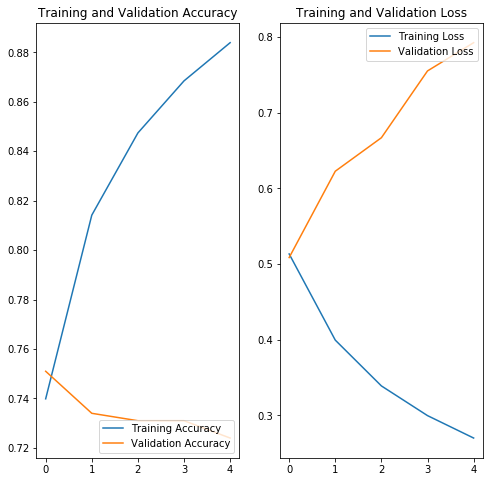

In [27]:
acc_lenetm = hist_lenet_modified.history['acc']
val_acc_lenetm = hist_lenet_modified.history['val_acc']

loss_lenetm = hist_lenet_modified.history['loss']
val_loss_lenetm = hist_lenet_modified.history['val_loss']
epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_lenetm, label='Training Accuracy')
plt.plot(epochs_range, val_acc_lenetm, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_lenetm, label='Training Loss')
plt.plot(epochs_range, val_loss_lenetm, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### VGG16

In [0]:
class VGGNet:
    
    def build():
        model = Sequential()
        inputShape = (150, 150, 3)
        
        model.add(Conv2D(64, (3, 3), padding="same", input_shape=inputShape))
        model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))

        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
        model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))

        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
        model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
        model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))

        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(Conv2D(512, (3, 3), activation="relu", padding="same"))
        model.add(Conv2D(512, (3, 3), activation="relu", padding="same"))
        model.add(Conv2D(512, (3, 3), activation="relu", padding="same"))

        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(Conv2D(512, (3, 3), activation="relu", padding="same"))
        model.add(Conv2D(512, (3, 3), activation="relu", padding="same"))
        model.add(Conv2D(512, (3, 3), activation="relu", padding="same"))

        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))  

        model.add(Flatten())
        model.add(Dense(4096, activation="relu"))
        model.add(Dense(4096, activation="relu"))
        model.add(Dense(1, activation="sigmoid"))
        
        return model



In [0]:
model2 = VGGNet.build()
model2.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [15]:
tpu_vgg_model = tf.contrib.tpu.keras_to_tpu_model(model2, strategy=tf.contrib.tpu.TPUDistributionStrategy(\
                                                                                                                 tf.contrib.cluster_resolver.TPUClusterResolver(TPU_ADDRESS)))


INFO:tensorflow:Querying Tensorflow master (b'grpc://10.125.68.122:8470') for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 9711671545519043341)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 13093254987392208662)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 6111199635763726666)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 14865832664226581254)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 7023918138836435020)
INFO:tensorflow:*** Available Device: _DeviceAttribu

In [0]:
history_vgg = tpu_vgg_model.fit_generator(
      train_generator,
      steps_per_epoch=total_train,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=total_val)

Epoch 1/5
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(16,), dtype=tf.int32, name='core_id0'), TensorSpec(shape=(16, 150, 150, 3), dtype=tf.float32, name='conv2d_input_10'), TensorSpec(shape=(16, 1), dtype=tf.float32, name='dense_2_target_30')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for conv2d_input
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 19.641897439956665 secs
INFO:tensorflow:Setting weights on TPU model.
  15/2000 [..............................] - ETA: 1:55:34 - loss: 0.9454 - acc: 0.5026INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(10,), dtype=tf.int32, name='core_id0'), TensorSpec(shape=(10, 150, 150, 3), dtype=tf.float32, name='conv2d_input_10'), TensorSpec(shape=(10, 1), dtype=tf.float32, name='dense_2_target_30')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping p

In [0]:
acc_vgg = history_vgg.history['acc']
val_acc_vgg = history_vgg.history['val_acc']

loss_vgg = history_vgg.history['loss']
val_loss_vgg = history_vgg.history['val_loss']
epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accacc_vgg_lenetm, label='Training Accuracy')
plt.plot(epochs_range, val_acc_vgg, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_vgg, label='Training Loss')
plt.plot(epochs_range, val_loss_vgg, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()